<a href="https://colab.research.google.com/github/thedoctorrr17/Effeciency-Energy-Analysis/blob/main/Tubes_SDR_121320020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Effeciency Energy Analysis**
# Data Science Task Engineering Physics

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA (Exploratory Data Analysis)

## Load Data

In [2]:
df=pd.read_csv("/content/energy_efficiency_data.csv")

In [18]:
df.columns = df.columns.str.lower()

In [ ]:
df.drop(['roof_area'], axis=1, inplace=True)
df.drop(['orientation'], axis=1, inplace=True)


KeyError: "['roof_area'] not found in axis"

## Check Column & Row

In [ ]:
df.shape

(768, 8)

Output kode memberikan informasi bahwa:

Terdapat 768 baris records dalam
Terdapat 8 kolom yang terdiri dari: relative_compactness	surface_area, wall_area, overall_height, glazing_area, glazing_area_distribution, heating_load, cooling_load

In [ ]:
df.head(-10)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
753,0.69,735.0,294.0,220.50,3.5,3,0.4,5,14.28,15.87
754,0.69,735.0,294.0,220.50,3.5,4,0.4,5,14.37,16.54
755,0.69,735.0,294.0,220.50,3.5,5,0.4,5,14.21,16.74
756,0.66,759.5,318.5,220.50,3.5,2,0.4,5,14.96,17.64


## Analysis Data

### ***Univariate Analysis***


Univariate visualization merupakan bentuk visualisasi data yang hanya merepresentasikan informasi yang terdapat pada satu variabel. Jenis visualisasi ini umumnya digunakan untuk memberikan gambaran terkait distribusi sebuah variabel dalam suatu dataset.

In [ ]:
df.describe()

,relative_compactness,surface_area,wall_area,overall_height,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,5.25000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,1.75114,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,3.50000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,3.50000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,5.25000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,7.00000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,7.00000,0.400000,5.00000,43.100000,48.030000


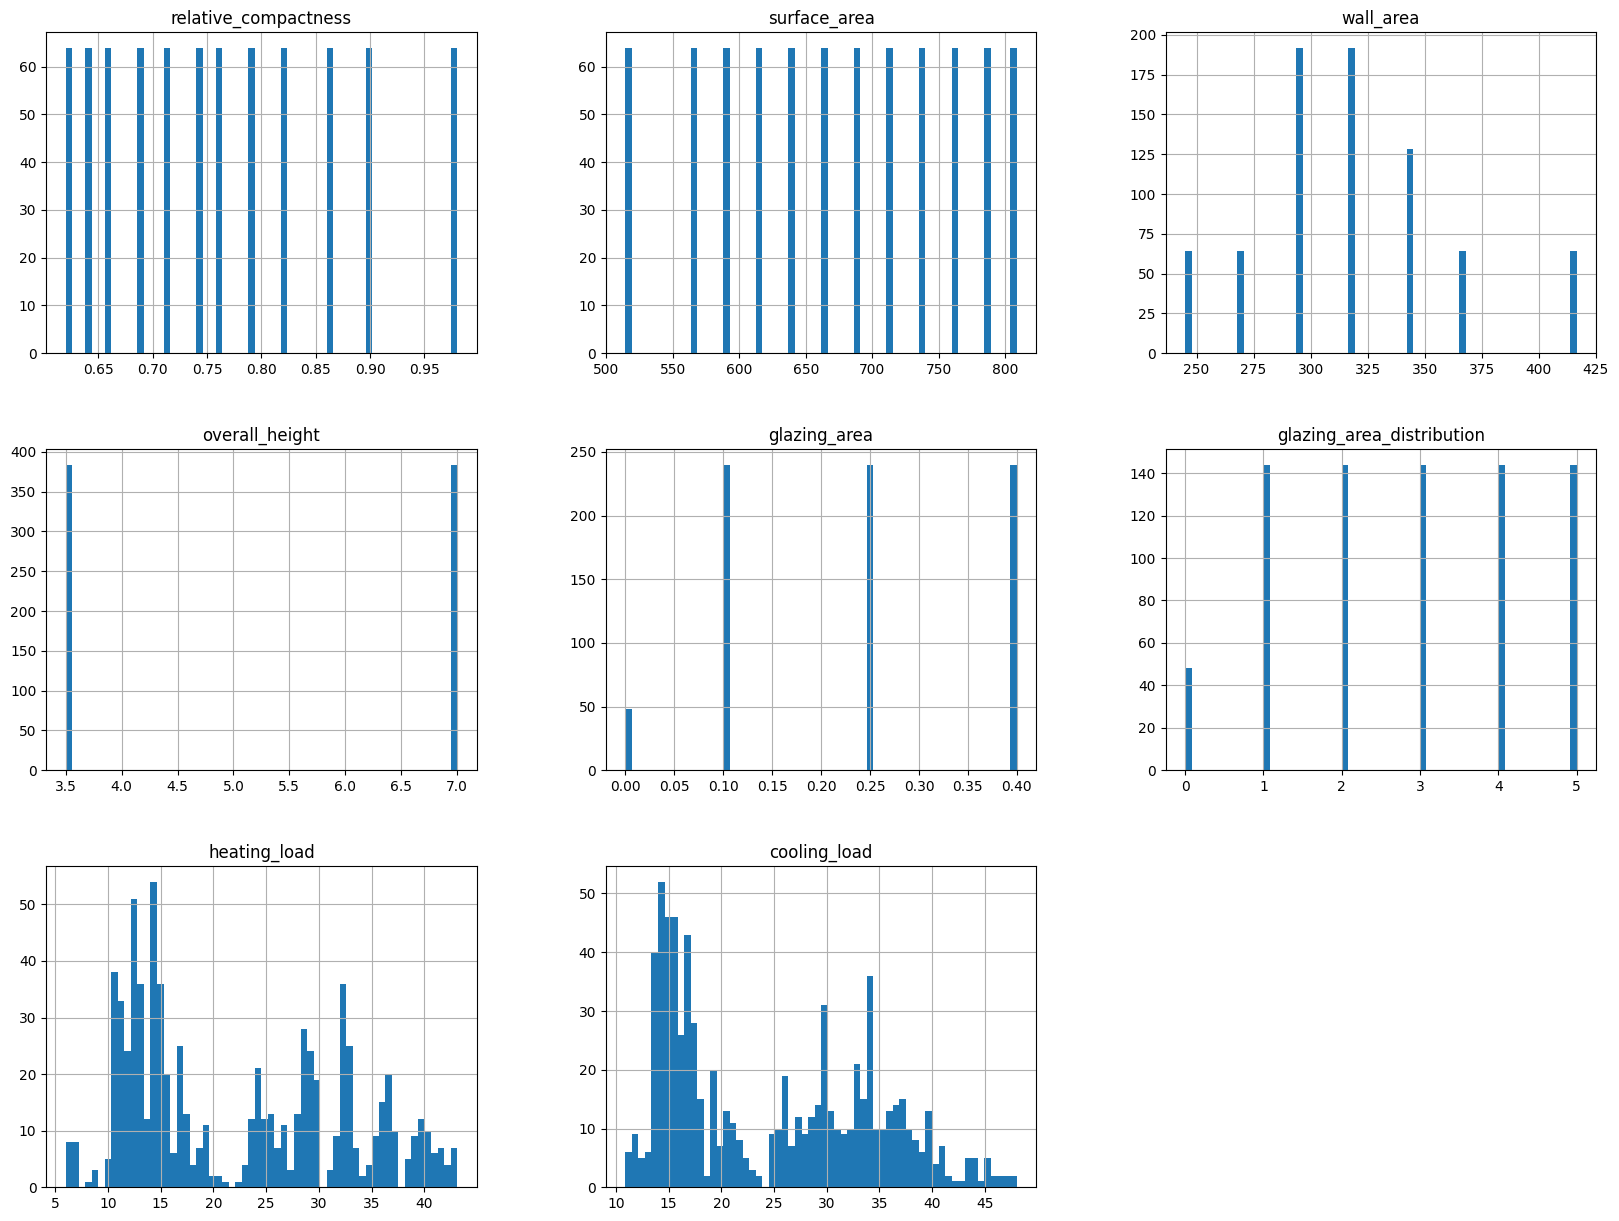

In [ ]:
df.hist(bins = 60, figsize = (20,15))
plt.show()

Berdasarkan data diatas, didapatkan
* Luas permukaan bangunan paling luas dengan ukuran 808.5 meter persegi
* Luas dinding bangunan berkisar antara 214 hingga 416,5 meter persegi
* Tinggi atap paling tinggi adalah 7 meter
* Rasio volume bangunan berkisar antara 0,62 hingga 0,98

<Axes: >

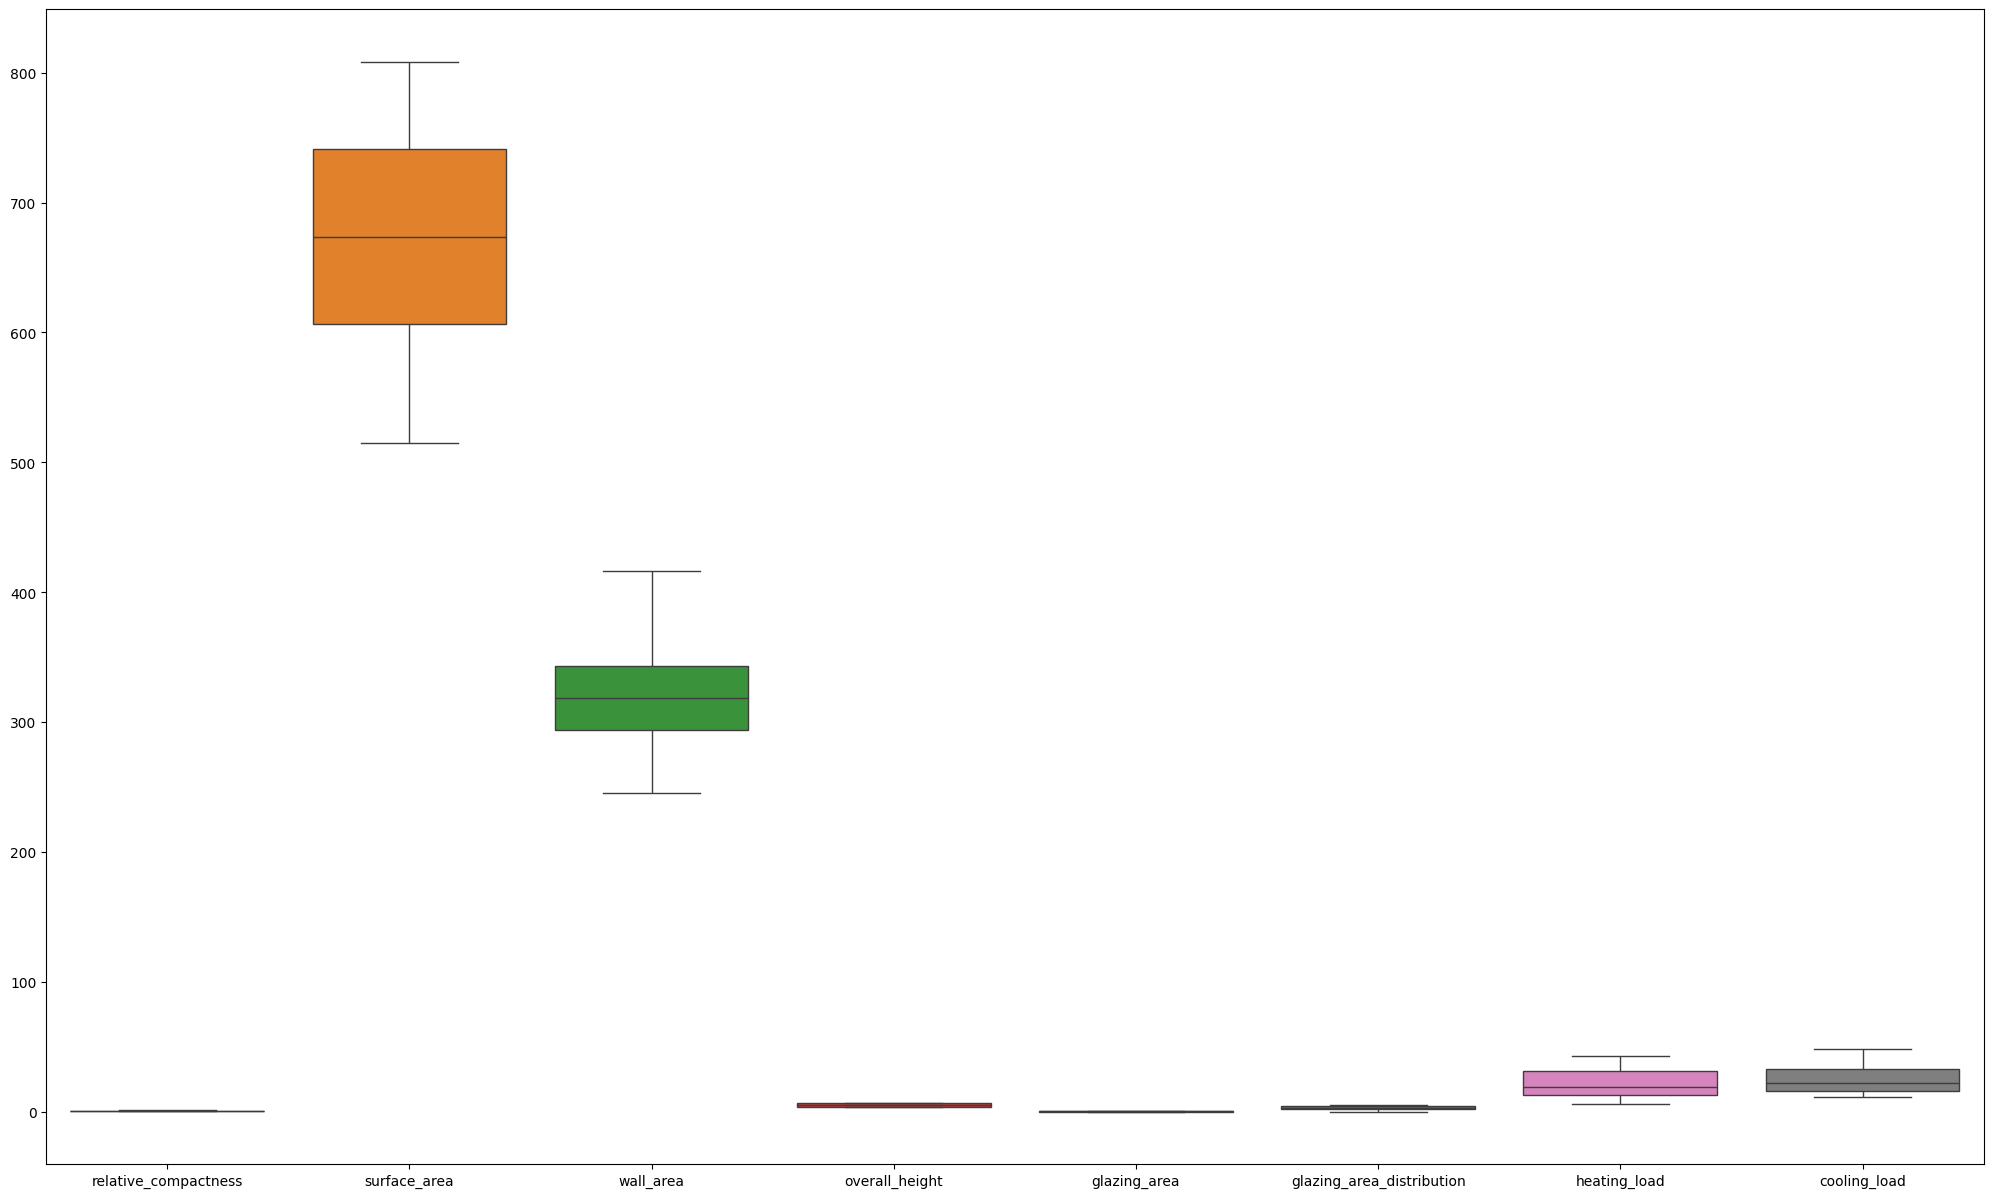

In [ ]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df)

### **Multivariate Analysis**

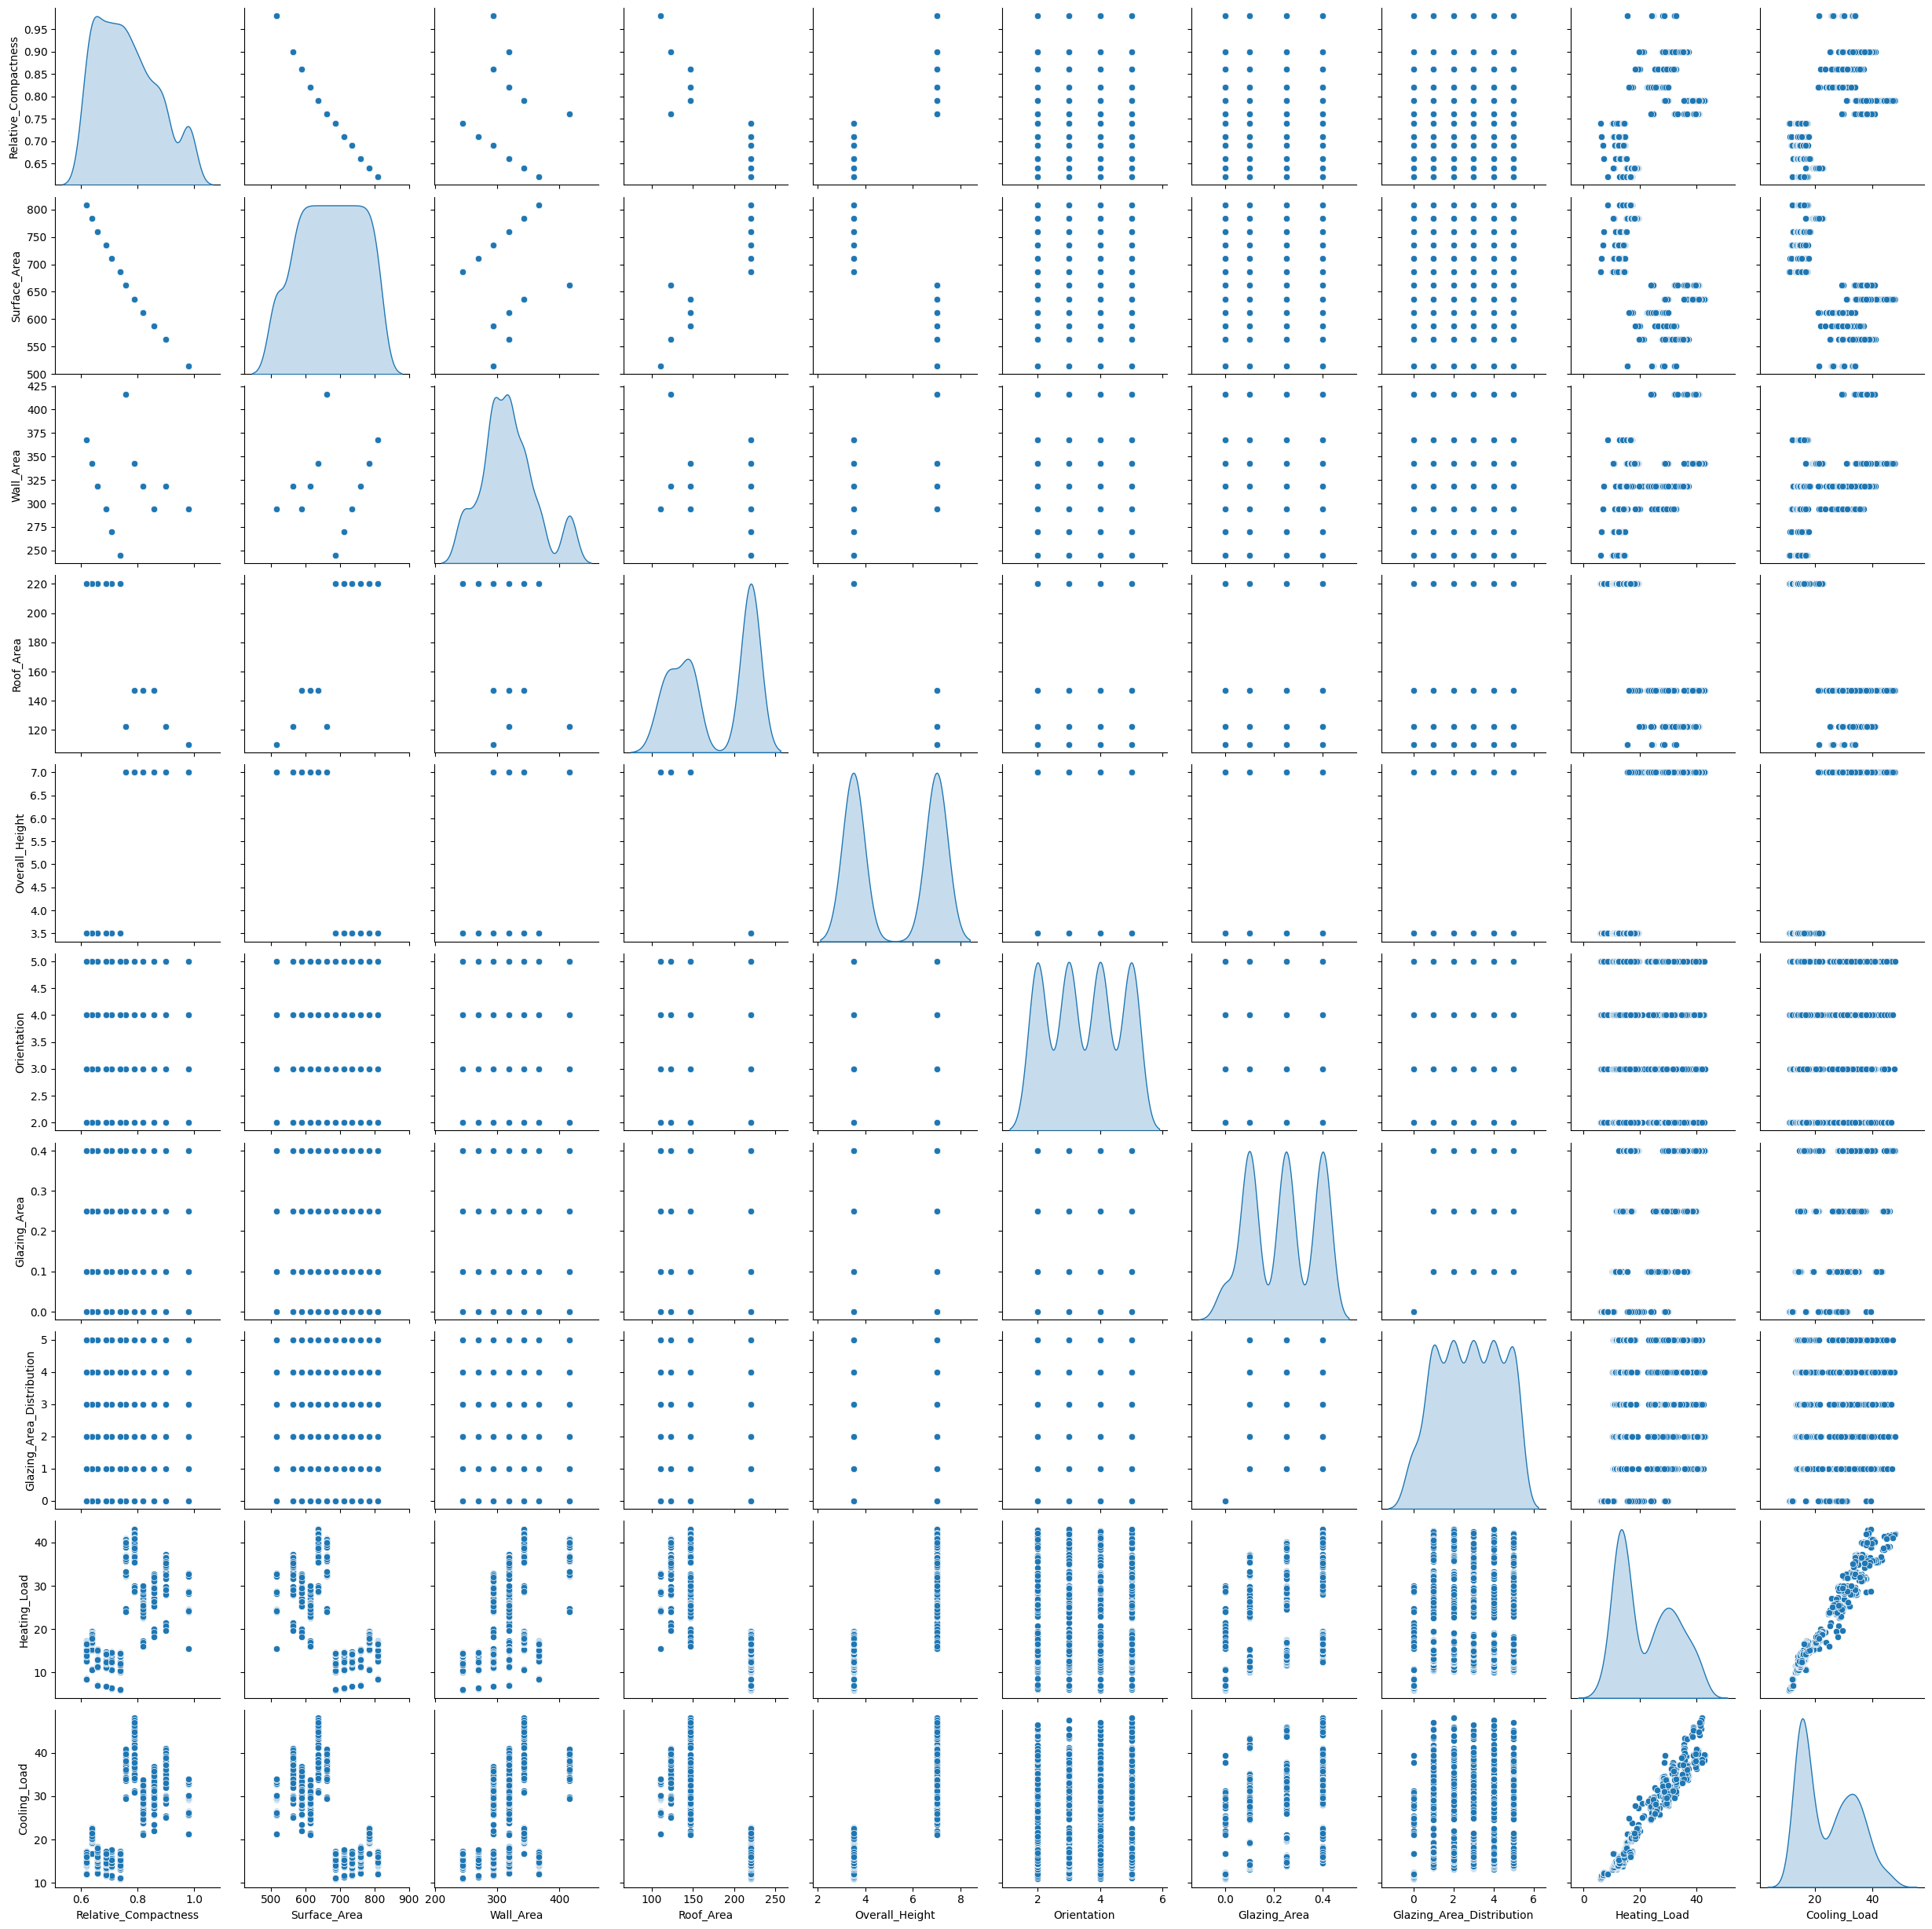

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Dari grafik, terlihat plot relasi masing-masing fitur numerik pada dataset. Pada pola sebaran data grafik pairplot sebelumnya, terlihat bahwa 'median_income' memiliki korelasi dengan fitur 'median_house_value'. Sedangkan kedua fitur lainnya terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola.

### Correlation Map

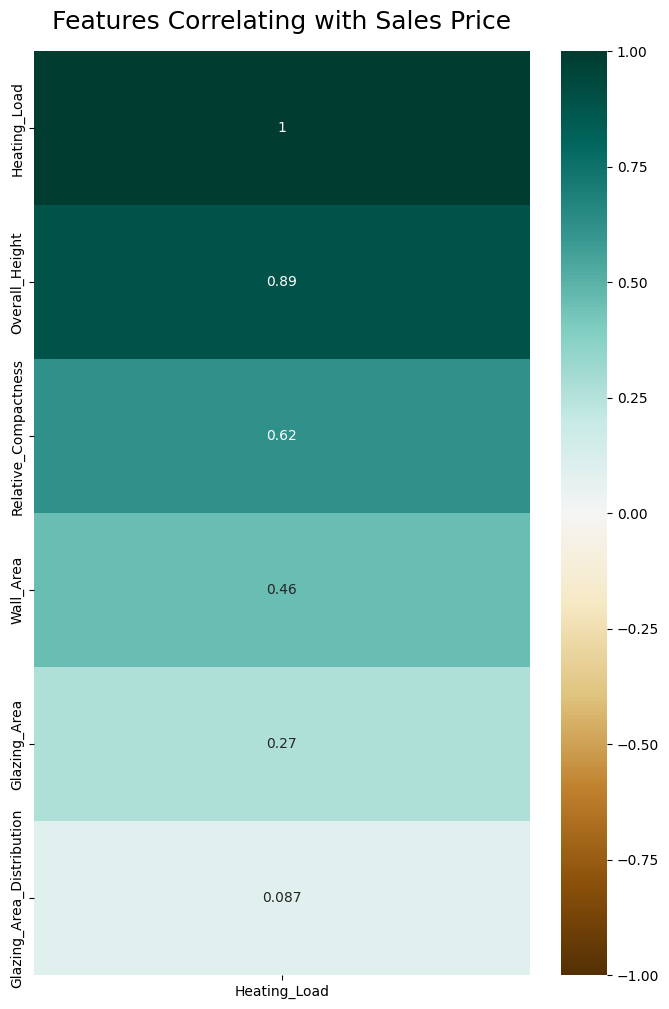

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Heating_Load']].sort_values(by='Heating_Load', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

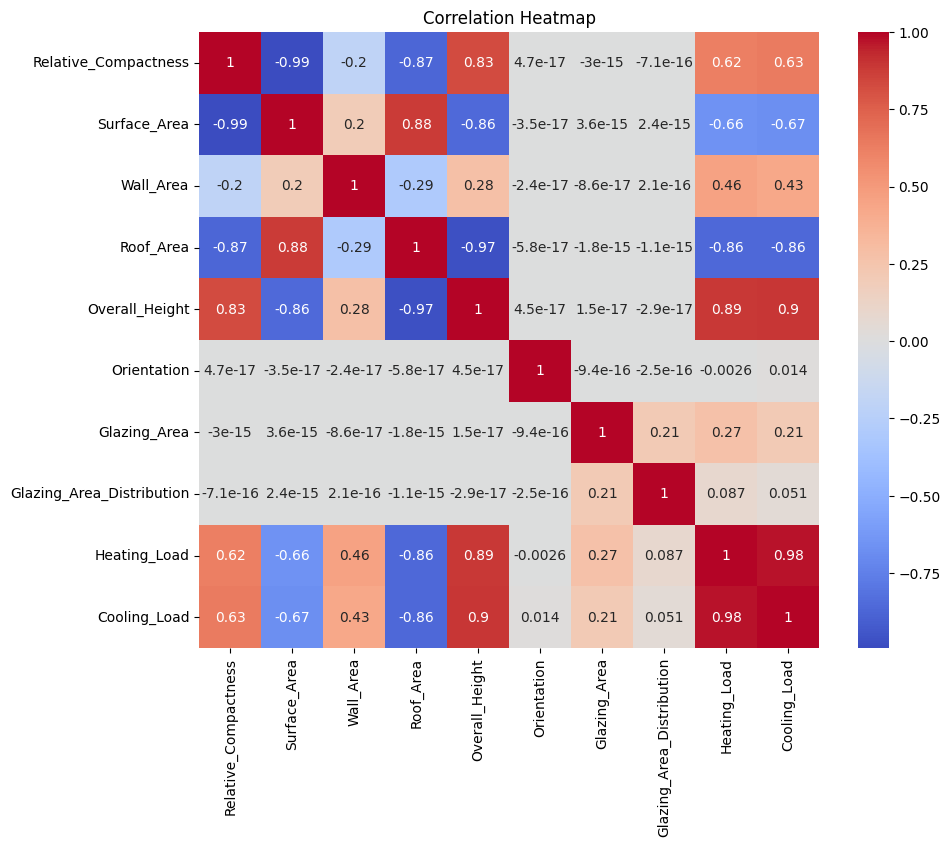

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

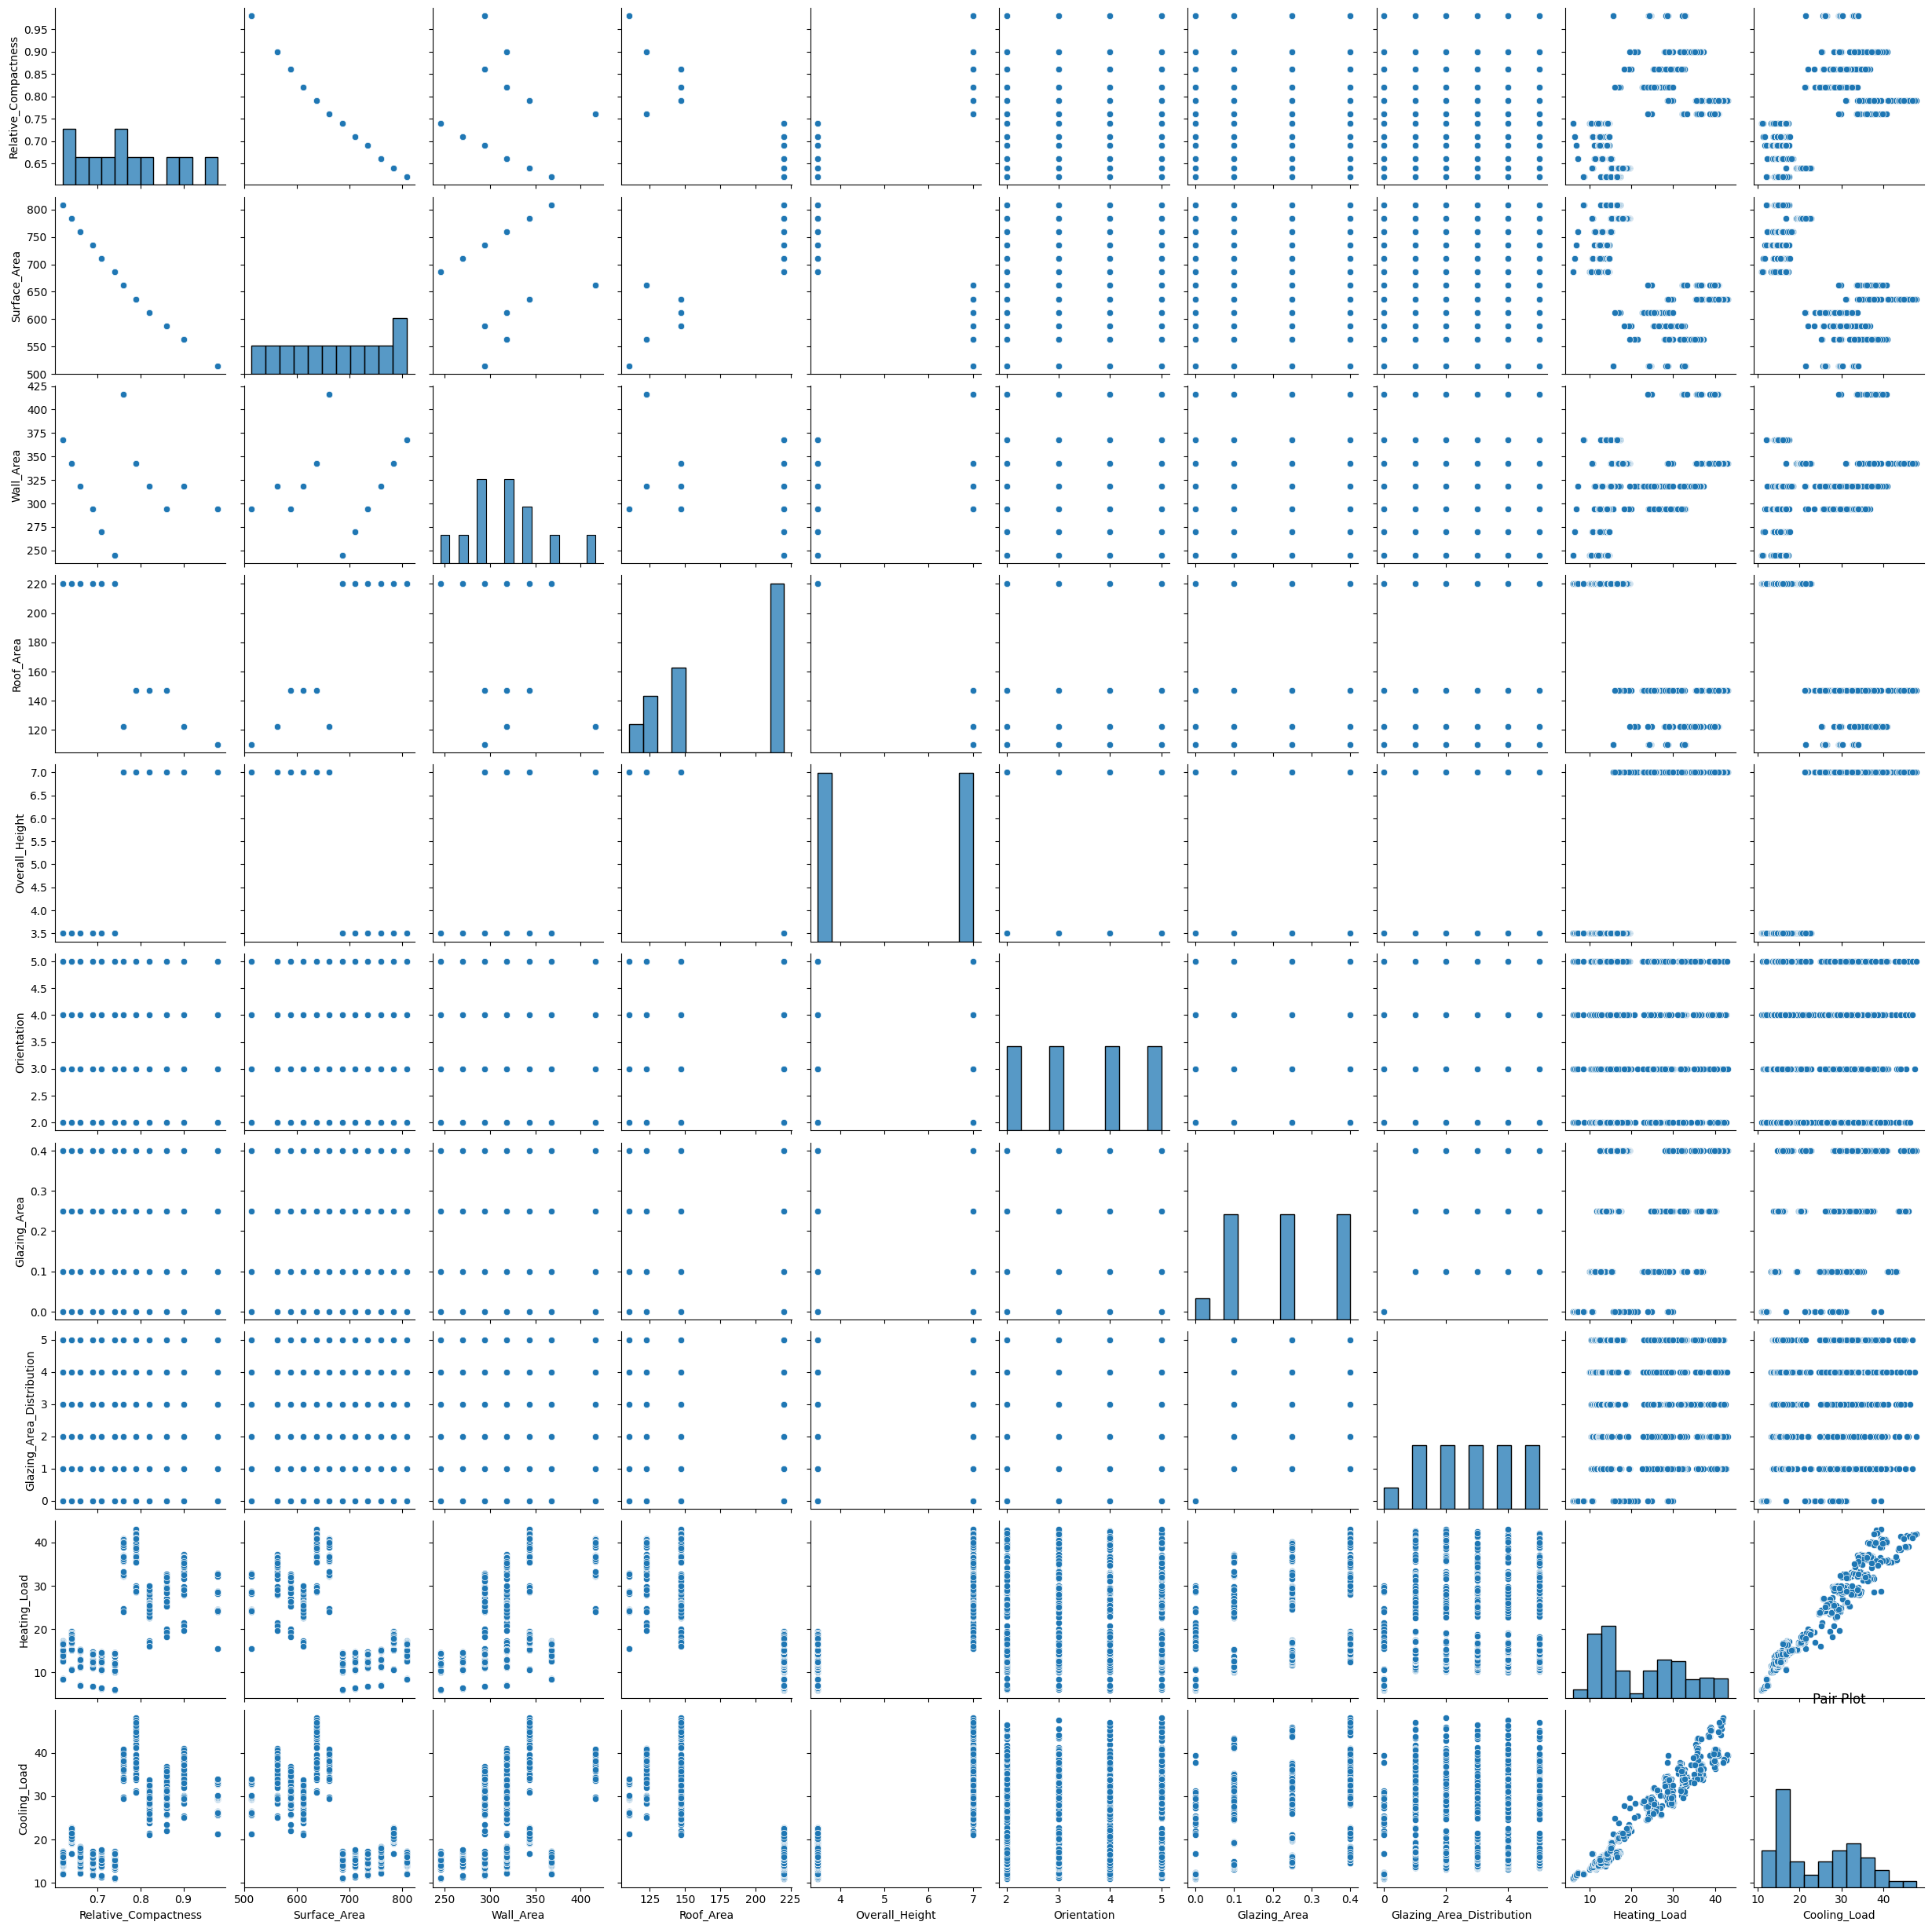

In [ ]:
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

<Axes: xlabel='Heating_Load', ylabel='Cooling_Load'>

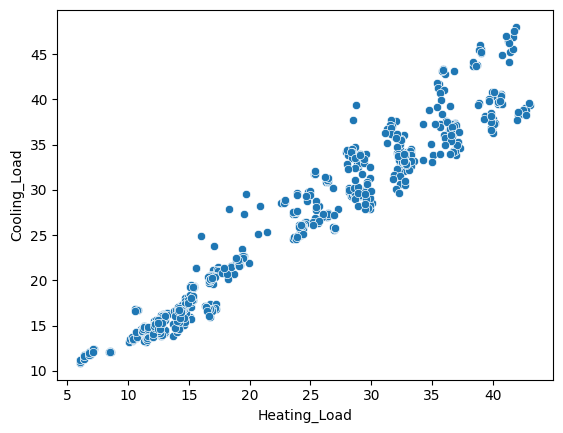

In [ ]:
sns.scatterplot(x=df["Heating_Load"],y=df["Cooling_Load"])

<Axes: xlabel='Surface_Area', ylabel='Relative_Compactness'>

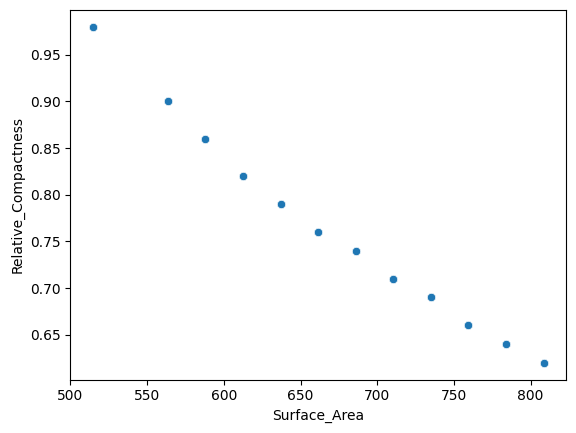

In [ ]:
sns.scatterplot(x=df["Surface_Area"],y=df["Relative_Compactness"])

<Axes: xlabel='Overall_Height', ylabel='Cooling_Load'>

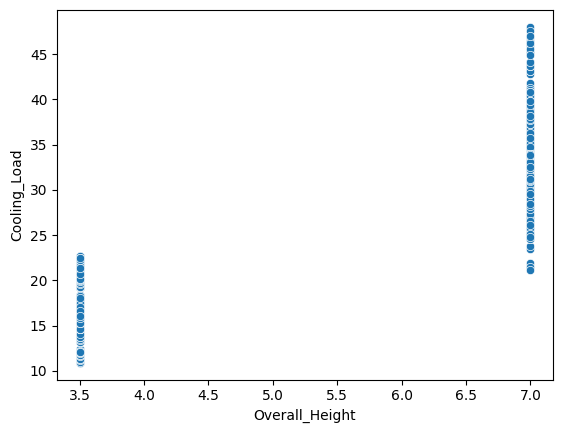

In [ ]:
sns.scatterplot(x=df["Overall_Height"],y=df["Cooling_Load"])

<Axes: xlabel='Overall_Height', ylabel='Heating_Load'>

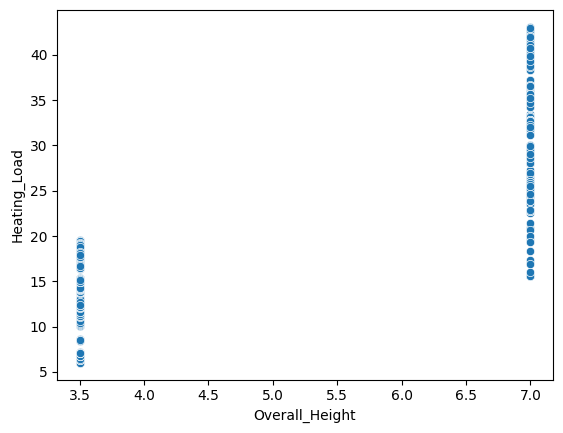

In [ ]:
sns.scatterplot(x=df["Overall_Height"],y=df["Heating_Load"])

<Axes: xlabel='Roof_Area', ylabel='Cooling_Load'>

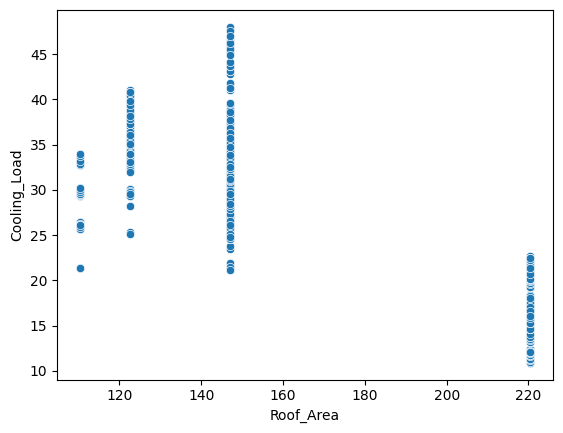

In [ ]:
sns.scatterplot(x=df["Roof_Area"],y=df["Cooling_Load"])

<Axes: xlabel='Roof_Area', ylabel='Heating_Load'>

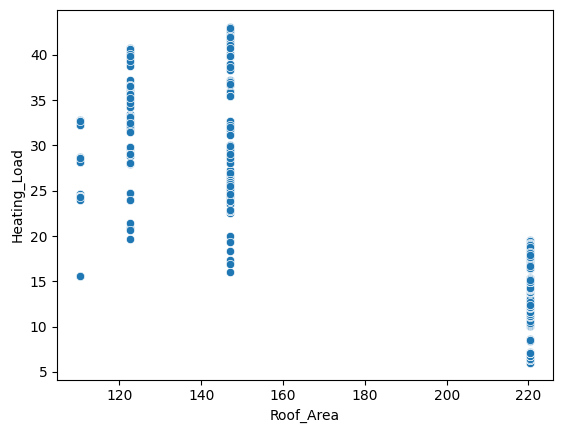

In [ ]:
sns.scatterplot(x=df["Roof_Area"],y=df["Heating_Load"])

# Data Preparation

##  Missing Value


In [ ]:
print(df.isnull().sum())
print(df.notnull().sum())

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64
Relative_Compactness         768
Surface_Area                 768
Wall_Area                    768
Roof_Area                    768
Overall_Height               768
Orientation                  768
Glazing_Area                 768
Glazing_Area_Distribution    768
Heating_Load                 768
Cooling_Load                 768
dtype: int64


## Duplicated Data

In [ ]:
df.duplicated().sum()

0

## Outliers

<Axes: >

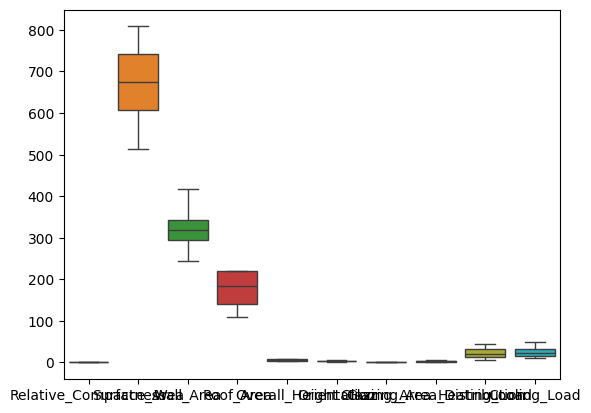

In [ ]:
sns.boxplot(data=df)

berdasarkan visualisasi diatas, dataset tidak memiliki outliers


# Data Pre-Processing

## PCA

In [4]:
X = df.iloc[:, :-2]
y = df.iloc[:, -2:]

In [5]:
from sklearn.decomposition import PCA

X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
pca = PCA()
pca.fit(X_standardized)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

In [6]:
eigenvalues=(eigenvalues-np.mean(eigenvalues))/np.std(eigenvalues)

In [7]:
threshold = -0.1
F = []
for i, eigenvalue in enumerate(eigenvalues):
    if eigenvalue >= threshold:
        F.append(eigenvectors[i])

In [8]:
column_names = [X.columns[j] for j in range(8)]
component_data = [{"Component": i, **{X.columns[j]: round(F[i][j],4) for j in range(8)}} for i in range(len(F))]
pd.DataFrame(component_data).set_index("Component").head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
Component,,,,,,,,
0,0.4960,-0.5017,0.0325,-0.5050,0.4962,0.0,0.0000,-0.0000
1,-0.2447,0.2315,0.8943,-0.2061,0.2104,-0.0,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-0.7071,-0.7071
3,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-1.0,-0.0000,-0.0000


In [9]:
X_reduced = np.dot(X_standardized, np.array(F).T)

In [10]:
X_reduced.shape

(768, 4)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(df[['heating_load','cooling_load']])
princ_comp = pca.transform(df[['heating_load','cooling_load']])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.988, 0.012])

Dari output di atas 94.4% informasi pada kedua fitur 'Air temperature [K]' dan 'Process temperature [K]' terdapat pada PC1. Sedangkan sisanya, sebesar 5.6% terdapat pada PC2.

Berdasarkan hasil reduksi fitur (dimensi), dipertahankan PC1 (komponen). PC1 ini akan direpresentasikan sebagai fitur 'Temperature' menggantikan kedua fitur lainnya ('Air temperature [K]' dan 'Process temperature [K]')

# Model Development

## Linear Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
seed = 1

## Train Test Split

In [35]:
# split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30, random_state=seed)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30, random_state=seed)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# train the model and make predictions for heating_load
lr_heating = LinearRegression()
y1_pred = lr_heating.fit(X_train, y1_train).predict(X_test)

# train the model and make predictions for cooling_load
lr_cooling = LinearRegression()
y2_pred = lr_cooling.fit(X_train, y2_train).predict(X_test)

## Checking the Model


In [37]:
# check the model performance

# calculate the adjusted R2 score
adjuted_r2_heating = 1 - (1-r2_score(y1_test, y1_pred))*(len(y1_test)-1)/(len(y1_test)-X_test.shape[1]-1)
adjuted_r2_cooling = 1 - (1-r2_score(y2_test, y2_pred))*(len(y2_test)-1)/(len(y2_test)-X_test.shape[1]-1)
print('Heating load model adjusted R2 score: \n', adjuted_r2_heating.round(4))
print('Cooling load model adjusted R2 score: \n', adjuted_r2_cooling.round(4))
print('')

# calculate the MSE
print('MSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred).round(4))
print('MSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred).round(4))
print('')

# calculate the RMSE
print('RMSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred, squared=False).round(4))
print('RMSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred, squared=False).round(4))
print('')

# calculate the MAE
print('MAE of predicting heating load: \n', mean_absolute_error(y1_test, y1_pred).round(4))
print('MAE of predicting cooling load: \n', mean_absolute_error(y2_test, y2_pred).round(4))

Heating load model adjusted R2 score: 
 0.89
Cooling load model adjusted R2 score: 
 0.8592

MSE of predicting heating load: 
 10.8189
MSE of predicting cooling load: 
 12.3933

RMSE of predicting heating load: 
 3.2892
RMSE of predicting cooling load: 
 3.5204

MAE of predicting heating load: 
 2.3355
MAE of predicting cooling load: 
 2.5194


<ipython-input-39-e7759dd12036>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=features, rotation=45)
<ipython-input-39-e7759dd12036>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=features, rotation=45)


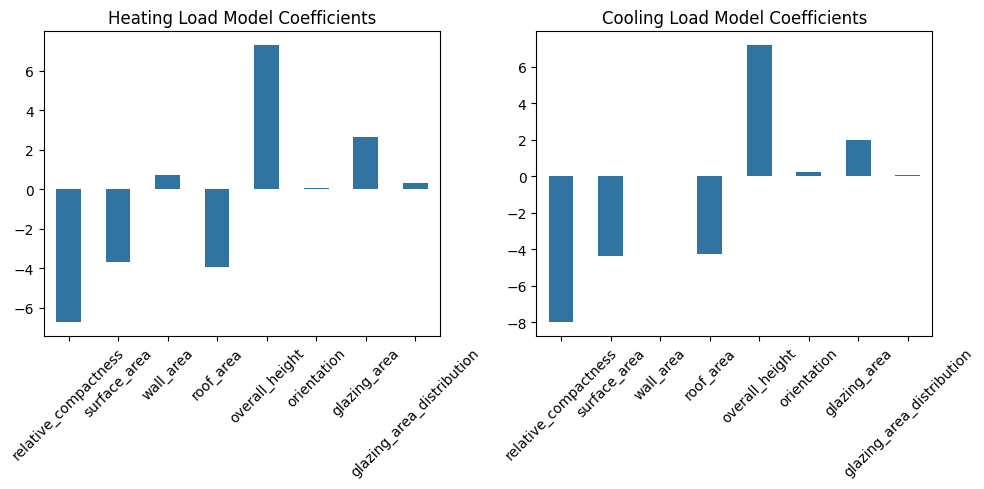

In [39]:
# plot the coefficients of features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=features, y=lr_heating.coef_, width=0.5, ax=axes[0])
axes[0].set_title('Heating Load Model Coefficients')
axes[0].set_xticklabels(labels=features, rotation=45)

sns.barplot(x=features, y=lr_cooling.coef_, width=0.5, ax=axes[1])
axes[1].set_title('Cooling Load Model Coefficients')
axes[1].set_xticklabels(labels=features, rotation=45)

plt.tight_layout()
plt.show()